In [10]:
%matplotlib inline

from PIL import Image
import numpy as np
from numpy import asarray
import math
import matplotlib.pyplot as plt

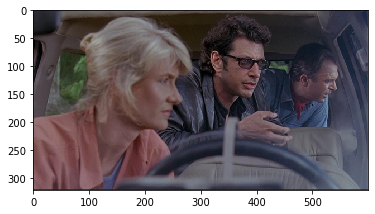

In [11]:
image = Image.open('./assets/rotate.png')
data = asarray(image)
plt.imshow(image)

In [12]:
rotate_angle = int(input('Enter the rotation angle in degrees : '))

Enter the rotation angle in degrees : 30


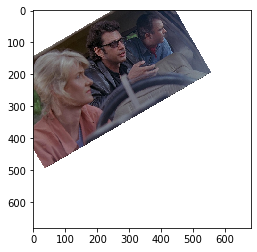

In [13]:
rotate_angle_rad  = rotate_angle * np.pi / 180.0
height, width, num_channels = data.shape
max_len = int(math.sqrt(height*height + width*width))
rotated_image = np.zeros((max_len, max_len, num_channels))

h, w, _ = rotated_image.shape
originy = int(h // 2)
originx = int(w // 2)

for r in range(h):
    for c in range(w):
        y = (r-originx)*math.cos(rotate_angle_rad) + (c-originy)*math.sin(rotate_angle_rad)
        x = -(r-originx)*math.sin(rotate_angle_rad) + (c-originy)*math.cos(rotate_angle_rad)
        
        y += originy
        x += originx 
        
        x = round(x)
        y = round(y)
        
        if (x >= 0 and y >= 0 and x < width and y < height):
            rotated_image[r][c][:] = data[y][x][:]
            
output_image = Image.fromarray(rotated_image.astype("uint8"))
output_image.save("./outputs/rotated_image.png")
plt.imshow(output_image)